<a href="https://colab.research.google.com/github/razaool/salary-performance-analysis-NBA-24-25/blob/main/salary_performace_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/nba_stats_cleaned.xlsx')
display(df.head(50))

In [ ]:
df['24/25 Salary'] = df['24/25 Salary'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['24/25 Salary'] = pd.to_numeric(df['24/25 Salary'], errors='coerce')
display(df.head())

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,24/25 Salary
0,Nikola Jokic,29,DEN,C,70,70,36.7,11.2,19.5,0.576,...,29.5,12.7,3.8,16.4,0.307,9.9,3.3,13.3,9.8,51415938.0
1,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,0.519,...,34.8,11.9,4.8,16.7,0.309,8.9,2.6,11.5,8.9,35859950.0
2,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,0.601,...,35.2,7.8,3.7,11.5,0.241,6.9,2.5,9.5,6.6,48787676.0
3,Luka Doncic,25,DAL/LAL,PG,50,50,35.4,9.2,20.5,0.450,...,33.9,3.5,2.4,5.9,0.160,5.5,1.2,6.7,3.9,43031940.0
4,Karl-Anthony Towns,29,NYK,C,72,72,35.0,8.9,16.9,0.526,...,27.4,6.3,3.8,10.1,0.193,3.5,0.1,3.6,3.5,49205800.0


In [ ]:
df_filtered = df[df['GS'] >= 65].copy()
display(df_filtered.head())

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,24/25 Salary
0,Nikola Jokic,29,DEN,C,70,70,36.7,11.2,19.5,0.576,...,29.5,12.7,3.8,16.4,0.307,9.9,3.3,13.3,9.8,51415938.0
1,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,0.519,...,34.8,11.9,4.8,16.7,0.309,8.9,2.6,11.5,8.9,35859950.0
2,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,0.601,...,35.2,7.8,3.7,11.5,0.241,6.9,2.5,9.5,6.6,48787676.0
4,Karl-Anthony Towns,29,NYK,C,72,72,35.0,8.9,16.9,0.526,...,27.4,6.3,3.8,10.1,0.193,3.5,0.1,3.6,3.5,49205800.0
5,Domantas Sabonis,28,SAC,C,70,70,34.7,7.5,12.8,0.590,...,21.6,7.4,2.7,10.1,0.199,4.2,1.1,5.2,4.4,39200000.0


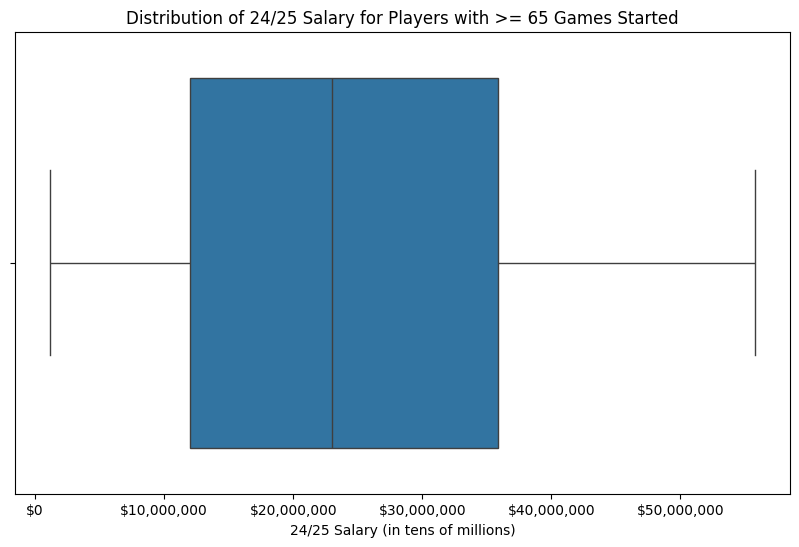

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='24/25 Salary')
plt.title('Distribution of 24/25 Salary for Players with >= 65 Games Started')
plt.xlabel('24/25 Salary (in tens of millions)')
tick_positions = [0, 10000000, 20000000, 30000000, 40000000, 50000000]
tick_labels = ['$0', '$10,000,000', '$20,000,000', '$30,000,000', '$40,000,000', '$50,000,000'] # Labels with dollar amounts

plt.xticks(tick_positions, tick_labels) # Set both positions and labels
plt.tick_params(axis='x', which='both', top=False) # Remove ticks from the top x-axis
plt.show()

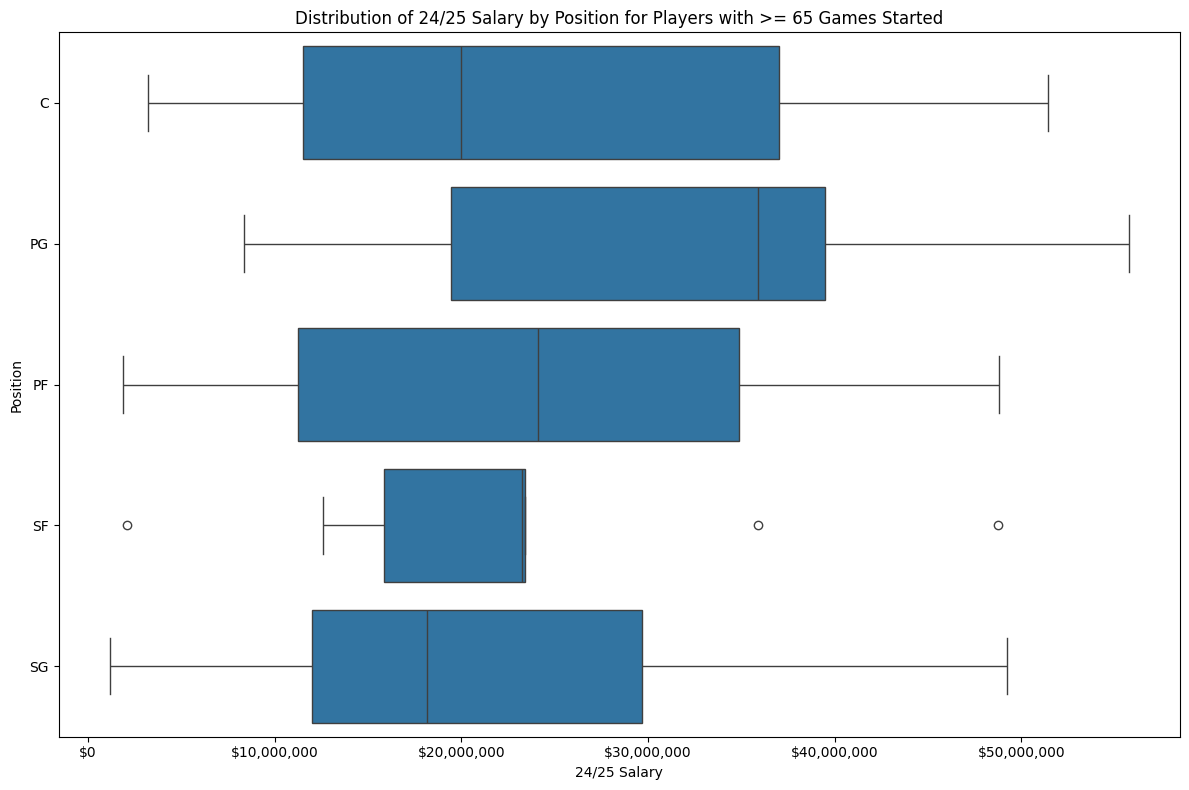

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, y='Pos', x='24/25 Salary')
plt.title('Distribution of 24/25 Salary by Position for Players with >= 65 Games Started')
plt.xlabel('24/25 Salary')
plt.ylabel('Position')

tick_positions = [0, 10000000, 20000000, 30000000, 40000000, 50000000]
tick_labels = ['$0', '$10,000,000', '$20,000,000', '$30,000,000', '$40,000,000', '$50,000,000'] # Labels with dollar amounts

plt.xticks(tick_positions, tick_labels) # Set both positions and labels
plt.tick_params(axis='x', which='both', top=False) # Remove ticks from the top x-axis
plt.tight_layout()
plt.show()

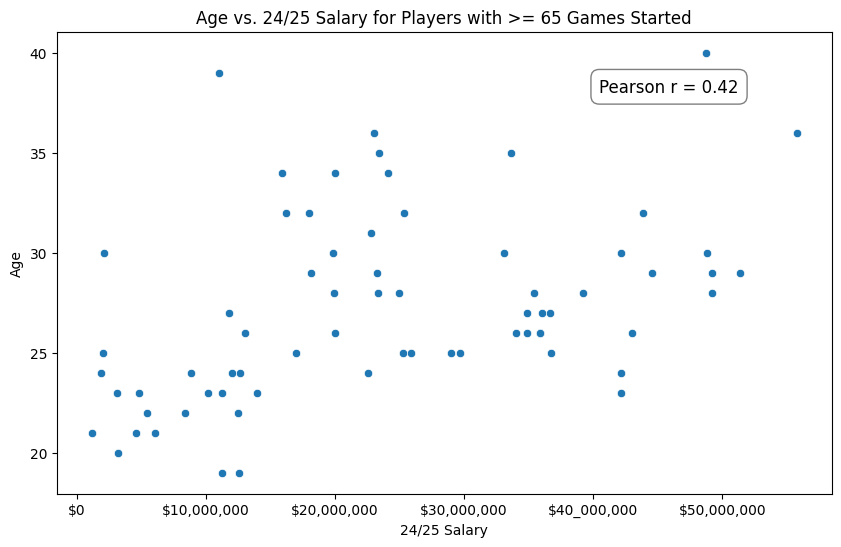

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, y='Age', x='24/25 Salary')
plt.title('Age vs. 24/25 Salary for Players with >= 65 Games Started')
plt.xlabel('24/25 Salary')
plt.ylabel('Age')

# Define the tick positions and their corresponding labels
tick_positions = [0, 10000000, 20000000, 30000000, 40000000, 50000000]
tick_labels = ['$0', '$10,000,000', '$20,000,000', '$30,000,000', '$40_000,000', '$50,000,000'] # Labels with dollar amounts

plt.xticks(tick_positions, tick_labels) # Set both positions and labels
plt.tick_params(axis='x', which='both', top=False) # Remove ticks from the top x-axis

# Add Pearson correlation coefficient to the plot
correlation = df_filtered['Age'].corr(df_filtered['24/25 Salary'])
plt.text(0.7, 0.9, f'Pearson r = {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))

plt.show()

In [ ]:
salary_correlation = correlation_matrix['24/25 Salary'].sort_values(ascending=False)
print("Correlation with 24/25 Salary:")
print(salary_correlation)

Correlation with 24/25 Salary:
24/25 Salary    1.000000
PTS             0.750251
FG              0.738913
FGA             0.723043
FT              0.707788
FTA             0.691460
2PA             0.681962
2P              0.670093
MP              0.653814
TOV             0.630472
AST             0.605587
VORP            0.601646
GS              0.596866
OBPM            0.596810
WS              0.564772
OWS             0.558788
USG%            0.557130
PER             0.538120
MP2             0.528796
DRB             0.527917
BPM             0.521789
3PA             0.495633
3P              0.491297
STL             0.460441
TRB             0.457356
DWS             0.440312
AST%            0.427715
PF              0.368631
WS/48           0.324368
Age             0.314806
FT%             0.253902
BLK             0.220192
G               0.215276
TS%             0.200357
ORB             0.196898
FTr             0.186161
3P%             0.135500
DRB%            0.116941
FG%             0.1

In [ ]:
df_numerical = df.select_dtypes(include=['number'])
display(df_numerical.head())
df_numerical.info()

In [ ]:
correlation_matrix = df_numerical.corr()
display(correlation_matrix.head())

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,24/25 Salary
Age,1.000000,0.116564,0.161450,0.170139,0.129164,0.116433,0.069794,0.158768,0.121514,0.153349,...,-0.037619,0.242632,0.141286,0.221135,0.173397,0.172833,0.111212,0.184761,0.218508,0.314806
G,0.116564,1.000000,0.635924,0.624847,0.517360,0.493653,0.303416,0.459688,0.433337,0.251931,...,0.133772,0.555283,0.725775,0.666498,0.365591,0.386470,0.158226,0.377488,0.394636,0.215276
GS,0.161450,0.635924,1.000000,0.811785,0.769644,0.749525,0.216869,0.553747,0.553219,0.164076,...,0.355986,0.671762,0.738371,0.751150,0.300142,0.417627,0.087021,0.376515,0.600847,0.596866
MP,0.170139,0.624847,0.811785,1.000000,0.890411,0.897684,0.245884,0.713778,0.726401,0.282068,...,0.408260,0.602498,0.684751,0.682095,0.326715,0.490900,0.056387,0.425458,0.543632,0.653814
FG,0.129164,0.517360,0.769644,0.890411,1.000000,0.975418,0.304869,0.685561,0.687459,0.258559,...,0.672396,0.674948,0.653666,0.718999,0.382035,0.610274,0.027159,0.513446,0.703114,0.738913


/tmp/ipython-input-2180084955.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_correlation_filtered.values, y=salary_correlation_filtered.index, palette='coolwarm')


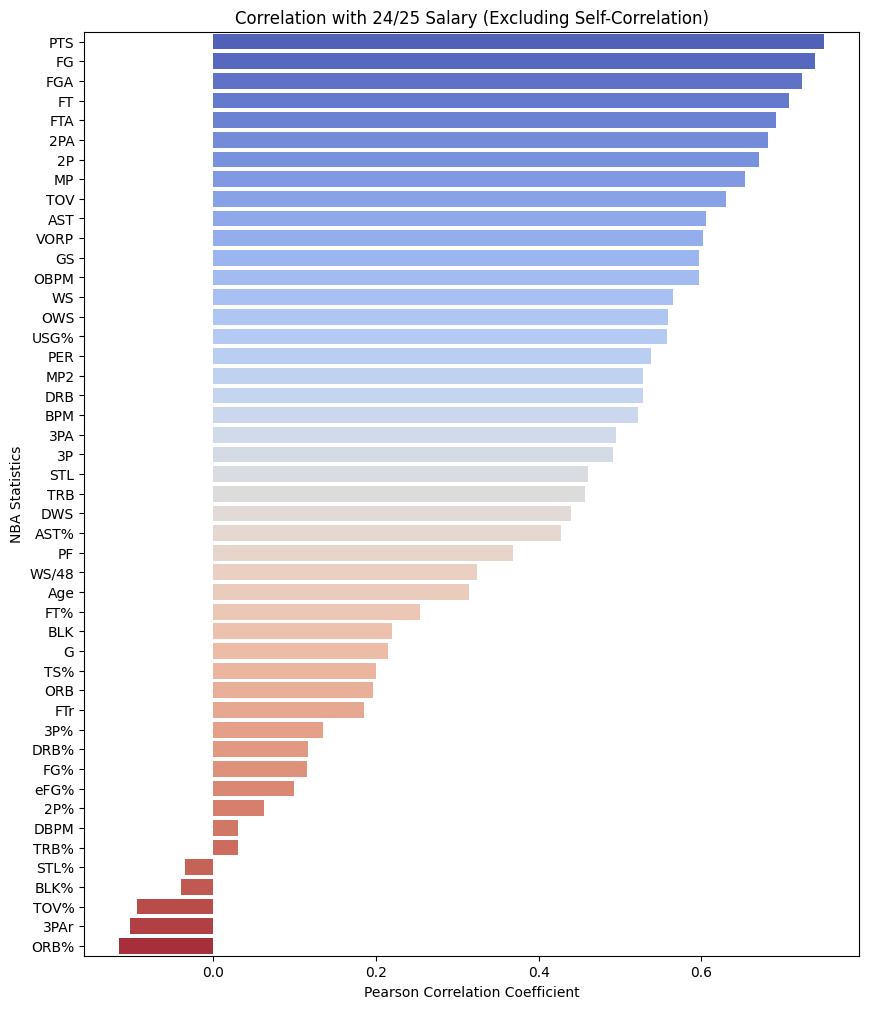

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the correlation of 24/25 Salary with itself
salary_correlation_filtered = salary_correlation.drop('24/25 Salary')

plt.figure(figsize=(10, 12))
sns.barplot(x=salary_correlation_filtered.values, y=salary_correlation_filtered.index, palette='coolwarm')
plt.title('Correlation with 24/25 Salary (Excluding Self-Correlation)')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('NBA Statistics')
plt.show()

In [ ]:
# Remove the correlation of 24/25 Salary with itself
salary_correlation_filtered = salary_correlation.drop('24/25 Salary')

# Sort the correlations by absolute value in descending order
sorted_correlations = salary_correlation_filtered.abs().sort_values(ascending=False)

# Select the top 15 features
top_features = sorted_correlations.head(15).index.tolist()

# Start with the top features
features = top_features.copy()

# Remove specified features
features_to_remove = ['FGA', 'FT', 'FTA', '2PA', '2P', 'TOV', 'AST', 'GS', 'OBPM', 'OWS']
for feature in features_to_remove:
    if feature in features:
        features.remove(feature)

# Add specified features
features_to_add = ['FG%', '3P%', 'eFG%', 'PER', 'TS%', 'USG%', 'WS/48', 'BPM']
for feature in features_to_add:
    if feature not in features:
        features.append(feature)


print("Updated selected features for predicting salary:")
print(features)

Updated selected features for predicting salary:
['PTS', 'FG', 'MP', 'VORP', 'WS', 'FG%', '3P%', 'eFG%', 'PER', 'TS%', 'USG%', 'WS/48', 'BPM']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

X = df_filtered[features]
y = df_filtered['24/25 Salary']

# Impute missing values in X
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (55, 13)
Shape of X_test: (14, 13)
Shape of y_train: (55,)
Shape of y_test: (14,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 15135329.15
R-squared: -0.10


In [ ]:
# Apply the same imputer to the full df_filtered features
X_filtered_imputed = imputer.transform(df_filtered[features])

df_filtered['Predicted Salary'] = model.predict(X_filtered_imputed)
df_filtered['Residual'] = df_filtered['24/25 Salary'] - df_filtered['Predicted Salary']
display(df_filtered[['Player', '24/25 Salary', 'Predicted Salary', 'Residual']].head())

,Player,24/25 Salary,Predicted Salary,Residual
0,Nikola Jokic,51415938.0,2.425131e+07,2.716462e+07
1,Shai Gilgeous-Alexander,35859950.0,3.527352e+07,5.864327e+05
2,Giannis Antetokounmpo,48787676.0,3.832847e+07,1.045921e+07
4,Karl-Anthony Towns,49205800.0,3.658479e+07,1.262101e+07
5,Domantas Sabonis,39200000.0,2.219457e+07,1.700543e+07


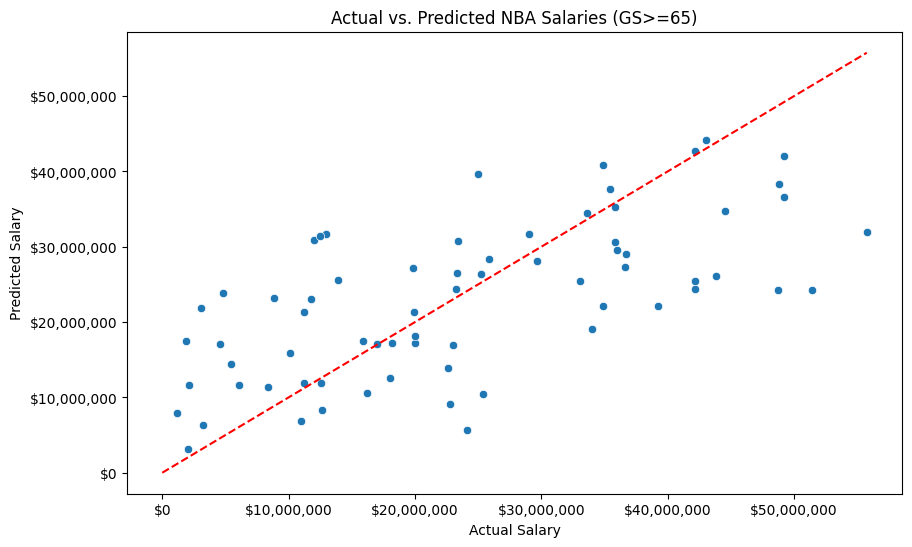

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='24/25 Salary', y='Predicted Salary')

# Add a diagonal line for reference
max_salary = df_filtered['24/25 Salary'].max()
plt.plot([0, max_salary], [0, max_salary], color='red', linestyle='--')

plt.title('Actual vs. Predicted NBA Salaries (GS>=65)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')

plt.xticks(tick_positions, tick_labels)
plt.yticks(tick_positions, tick_labels)

plt.tick_params(axis='x', which='both', top=False)
plt.tick_params(axis='y', which='both', right=False)

plt.show()

## Summary:

### Data Analysis Key Findings

* The selected features for predicting salary, based on the user's specifications, are: PTS, FG, MP, VORP, WS, FG%, 3P%, eFG%, PER, TS%, USG%, WS/48, and BPM.
* Missing values in the features were imputed using the mean of each column.
* The data was split into training and testing sets after imputation.
* A Linear Regression model was trained on the imputed training data to predict '24/25 Salary'.
* The model performance evaluation on the test set showed a Mean Absolute Error of approximately $15,135,329.15 and an R-squared value of -0.10. The negative R-squared indicates that the model does not fit the data well and performs worse than simply predicting the mean salary for all players.
* Despite the poor model performance, players were identified as potentially overpaid or underpaid based on the residuals (actual salary minus predicted salary). The top 10 potentially overpaid players had the largest positive residuals, while the top 10 potentially underpaid players had the largest negative residuals.
* A scatter plot visualizing actual versus predicted salaries showed a diagonal line representing equal actual and predicted salaries, allowing for visual identification of players above the line (potentially overpaid) and below the line (potentially underpaid) according to this model.

### Insights or Next Steps

* The current Linear Regression model with the selected features performs poorly in predicting player salaries, as indicated by the low and negative R-squared value. This suggests that a simple linear relationship might not fully capture the complexities of NBA player salaries, or that the selected features are not sufficient for accurate prediction with this model.
* To improve the model, we could:
    * Explore more advanced regression models (e.g., Ridge, Lasso, Polynomial Regression, tree-based models like Random Forest or Gradient Boosting).
    * Incorporate additional relevant features that might influence salary, such as age, draft position, years of experience, injury history, team performance, contract type, and market factors.
    * Perform more sophisticated feature engineering or selection.
* The identification of "overpaid" and "underpaid" players is highly dependent on the accuracy of the predictive model. Given the current model's poor performance, the interpretation of these findings should be cautious. A more accurate model would provide more reliable insights into which players are potentially over or undercompensated based on their on-court statistics.

/tmp/ipython-input-4096041105.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Residual', y='Player', data=overpaid_players.head(10), palette='Reds_d')


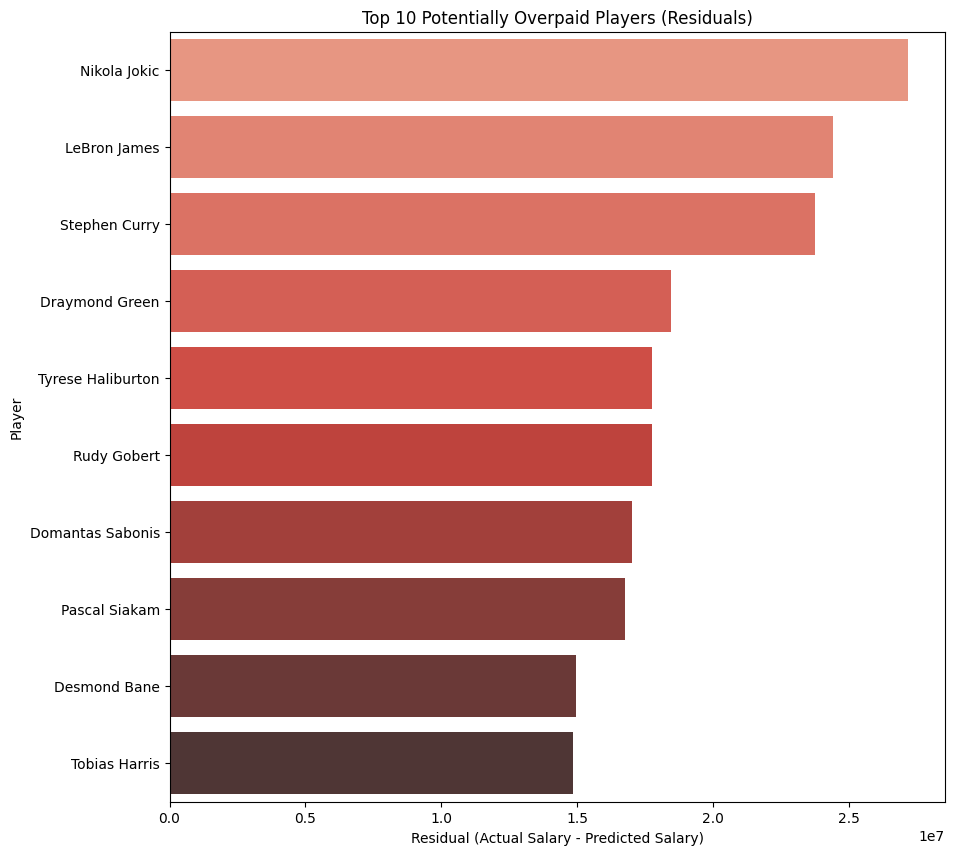

/tmp/ipython-input-4096041105.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Residual', y='Player', data=underpaid_players.head(10), palette='Blues_d')


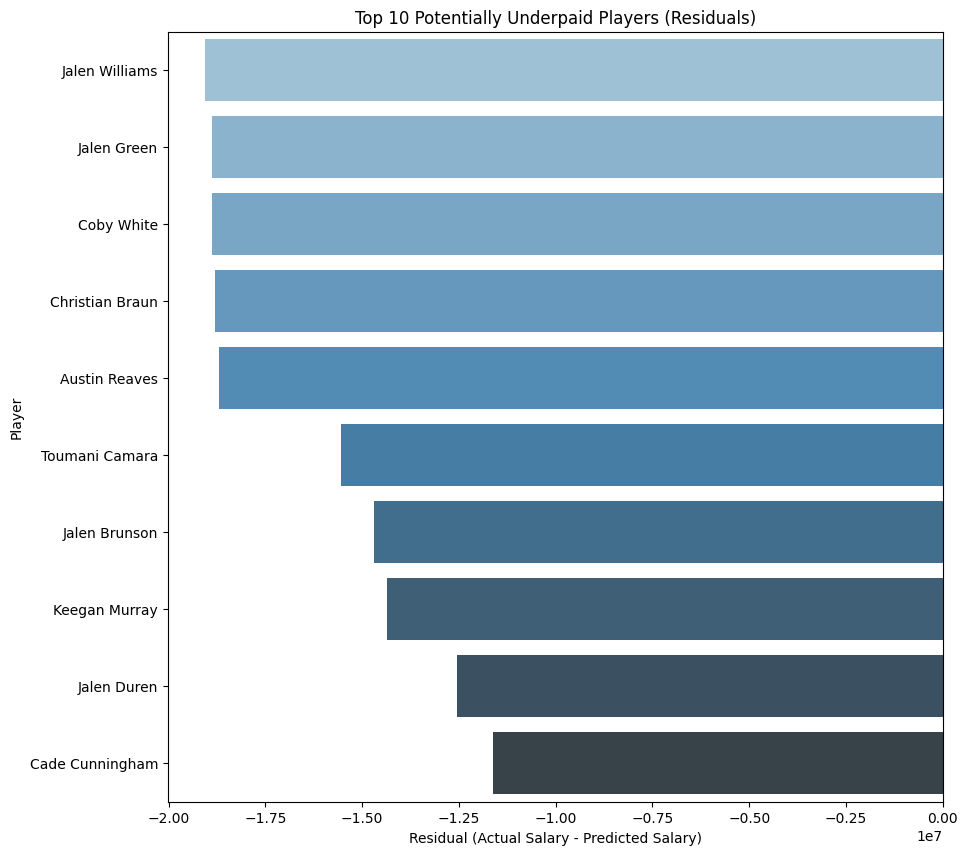

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 Overpaid Players
plt.figure(figsize=(10, 10))
sns.barplot(x='Residual', y='Player', data=overpaid_players.head(10), palette='Reds_d')
plt.title('Top 10 Potentially Overpaid Players (Residuals)')
plt.xlabel('Residual (Actual Salary - Predicted Salary)')
plt.ylabel('Player')
plt.show()

# Top 20 Underpaid Players
plt.figure(figsize=(10, 10))
sns.barplot(x='Residual', y='Player', data=underpaid_players.head(10), palette='Blues_d')
plt.title('Top 10 Potentially Underpaid Players (Residuals)')
plt.xlabel('Residual (Actual Salary - Predicted Salary)')
plt.ylabel('Player')
plt.show()

In [ ]:
# Find Bradley Beal in the overpaid players ranking
beal_overpaid_rank = overpaid_players[overpaid_players['Player'] == 'Bradley Beal']
if not beal_overpaid_rank.empty:
    display(beal_overpaid_rank[['Player', '24/25 Salary', 'Predicted Salary', 'Residual']])
    print(f"\nBradley Beal is ranked {beal_overpaid_rank.index[0] + 1} among all players by residual (potentially overpaid).")
else:
    print("Bradley Beal not found in the overpaid players list.")

# Find Bradley Beal in the underpaid players ranking
beal_underpaid_rank = underpaid_players[underpaid_players['Player'] == 'Bradley Beal']
if not beal_underpaid_rank.empty:
    display(beal_underpaid_rank[['Player', '24/25 Salary', 'Predicted Salary', 'Residual']])
    print(f"\nBradley Beal is ranked {beal_underpaid_rank.index[0] + 1} among all players by residual (potentially underpaid).")
else:
    print("Bradley Beal not found in the underpaid players list.")

Bradley Beal not found in the overpaid players list.
Bradley Beal not found in the underpaid players list.


In [ ]:
# Display the Player, 24/25 Salary, Predicted Salary, and Residual for all players in df_filtered
display(df_filtered[['Player', '24/25 Salary', 'Predicted Salary', 'Residual']])

,Player,24/25 Salary,Predicted Salary,Residual
0,Nikola Jokic,51415938.0,2.425131e+07,2.716462e+07
1,Shai Gilgeous-Alexander,35859950.0,3.527352e+07,5.864327e+05
2,Giannis Antetokounmpo,48787676.0,3.832847e+07,1.045921e+07
4,Karl-Anthony Towns,49205800.0,3.658479e+07,1.262101e+07
5,Domantas Sabonis,39200000.0,2.219457e+07,1.700543e+07
...,...,...,...,...
317,Jaylen Wells,1157153.0,7.881946e+06,-6.724793e+06
329,Kentavious Caldwell-Pope,22757000.0,9.094140e+06,1.366286e+07
338,Taurean Prince,2087519.0,1.165402e+07,-9.566504e+06
341,Tim Hardaway Jr.,16193183.0,1.058783e+07,5.605352e+06


/tmp/ipython-input-2377093285.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Residual', y='Player', data=df_filtered_sorted_residual, palette='coolwarm')


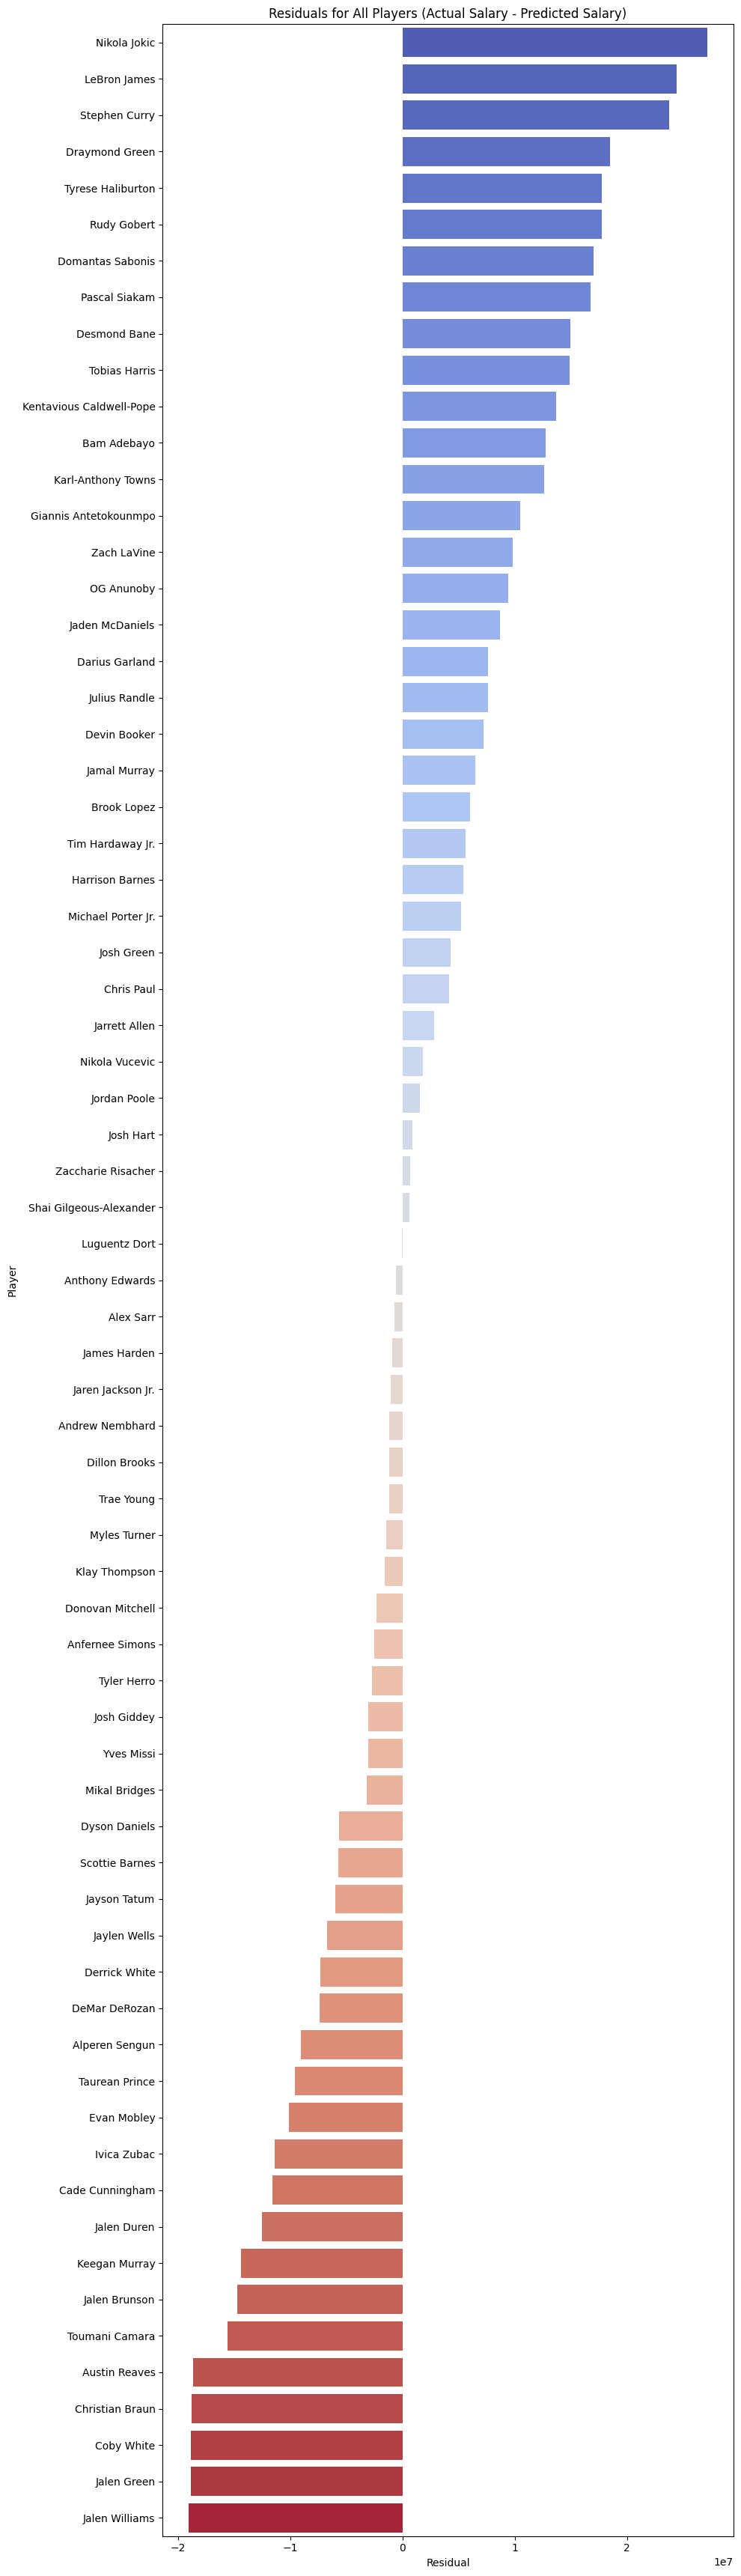

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort df_filtered by Residual for visualization
df_filtered_sorted_residual = df_filtered.sort_values(by='Residual', ascending=False)

plt.figure(figsize=(10, df_filtered_sorted_residual.shape[0] * 0.5)) # Adjust figure height based on number of players
sns.barplot(x='Residual', y='Player', data=df_filtered_sorted_residual, palette='coolwarm')
plt.title('Residuals for All Players (Actual Salary - Predicted Salary)')
plt.xlabel('Residual')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

In [ ]:
# Find Bradley Beal in the original DataFrame
beal_data = df[df['Player'] == 'Bradley Beal'].copy()

if beal_data.empty:
    print("Bradley Beal not found in the dataset.")
else:
    # Ensure salary is numeric (applying the same cleaning as before)
    beal_data['24/25 Salary'] = beal_data['24/25 Salary'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    beal_data['24/25 Salary'] = pd.to_numeric(beal_data['24/25 Salary'], errors='coerce')

    # Select the same features used in the model
    beal_features = beal_data[features]

    # Apply the same imputation used for the training data
    beal_features_imputed = imputer.transform(beal_features)

    # Predict salary using the trained model
    predicted_salary = model.predict(beal_features_imputed)

    # Calculate the residual
    residual = beal_data['24/25 Salary'].iloc[0] - predicted_salary[0]

    print(f"Actual Salary for Bradley Beal: ${beal_data['24/25 Salary'].iloc[0]:,.2f}")
    print(f"Predicted Salary for Bradley Beal: ${predicted_salary[0]:,.2f}")
    print(f"Residual for Bradley Beal (Actual - Predicted): ${residual:,.2f}")

Actual Salary for Bradley Beal: $50,203,930.00
Predicted Salary for Bradley Beal: $18,015,006.95
Residual for Bradley Beal (Actual - Predicted): $32,188,923.05


In [ ]:
df_filtered_mp2 = df[df['MP2'] >= 500].copy()
display(df_filtered_mp2.head())

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,24/25 Salary
0,Nikola Jokic,29,DEN,C,70,70,36.7,11.2,19.5,0.576,...,29.5,12.7,3.8,16.4,0.307,9.9,3.3,13.3,9.8,51415938.0
1,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,0.519,...,34.8,11.9,4.8,16.7,0.309,8.9,2.6,11.5,8.9,35859950.0
2,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,0.601,...,35.2,7.8,3.7,11.5,0.241,6.9,2.5,9.5,6.6,48787676.0
3,Luka Doncic,25,DAL/LAL,PG,50,50,35.4,9.2,20.5,0.450,...,33.9,3.5,2.4,5.9,0.160,5.5,1.2,6.7,3.9,43031940.0
4,Karl-Anthony Towns,29,NYK,C,72,72,35.0,8.9,16.9,0.526,...,27.4,6.3,3.8,10.1,0.193,3.5,0.1,3.6,3.5,49205800.0


In [ ]:
df_filtered_mp2_numerical = df_filtered_mp2.select_dtypes(include=['number'])
display(df_filtered_mp2_numerical.head())

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,24/25 Salary
0,29,70,70,36.7,11.2,19.5,0.576,2.0,4.7,0.417,...,29.5,12.7,3.8,16.4,0.307,9.9,3.3,13.3,9.8,51415938.0
1,26,76,76,34.2,11.3,21.8,0.519,2.1,5.7,0.375,...,34.8,11.9,4.8,16.7,0.309,8.9,2.6,11.5,8.9,35859950.0
2,30,67,67,34.2,11.8,19.7,0.601,0.2,0.9,0.222,...,35.2,7.8,3.7,11.5,0.241,6.9,2.5,9.5,6.6,48787676.0
3,25,50,50,35.4,9.2,20.5,0.450,3.5,9.6,0.368,...,33.9,3.5,2.4,5.9,0.160,5.5,1.2,6.7,3.9,43031940.0
4,29,72,72,35.0,8.9,16.9,0.526,2.0,4.7,0.420,...,27.4,6.3,3.8,10.1,0.193,3.5,0.1,3.6,3.5,49205800.0


In [ ]:
# Exclude 'Player' and '24/25 Salary' and highly correlated features from the numerical columns
features = df_filtered_mp2_numerical.columns.tolist()
features.remove('24/25 Salary')
features.remove('Age') # Based on previous correlation analysis, low correlation
features.remove('G') # Based on previous correlation analysis, low correlation
features.remove('MP2') # Redundant with MP

# Based on previous correlation analysis, remove one of the highly correlated pairs
features.remove('FGA') # Correlated with FG
features.remove('FTA') # Correlated with FT
features.remove('2PA') # Correlated with 2P
features.remove('TOV') # Correlated with FG, FGA, MP
features.remove('AST') # Correlated with GS, MP, FG, FGA, PTS
features.remove('GS') # Correlated with MP, FG, FGA, 2P, 2PA, FT, FTA, TOV, AST, PTS
features.remove('OBPM') # Correlated with PER, BPM, VORP, WS/48, WS, OWS, USG%, PTS, FG, FGA, MP
features.remove('OWS') # Correlated with WS, WS/48, VORP, PER, USG%, PTS, FG, FGA, MP

# Keep some of the percentage/efficiency stats based on previous analysis
features_to_keep_from_analysis = ['FG%', '3P%', 'eFG%', 'PER', 'TS%', 'USG%', 'WS/48', 'BPM']
features = [f for f in features if f in features_to_keep_from_analysis or f in ['PTS', 'FG', 'MP', 'VORP', 'WS']]

print("Selected features for predicting salary:")
print(features)

Selected features for predicting salary:
['MP', 'FG', 'FG%', '3P%', 'eFG%', 'PTS', 'PER', 'TS%', 'USG%', 'WS', 'WS/48', 'BPM', 'VORP']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

X = df_filtered_mp2[features]
y = df_filtered_mp2['24/25 Salary']

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (300, 13)
Shape of X_test: (75, 13)
Shape of y_train: (300,)
Shape of y_test: (75,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in y_train
y_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y_train_imputed = y_imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

model = LinearRegression()
model.fit(X_train, y_train_imputed)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

**Reasoning**:
The error indicates that the y_test dataset still contains NaN values. I need to impute the missing values in y_test before calculating the evaluation metrics.



In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in y_test using the same imputer fitted on y_train
y_test_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y_test_imputed = y_test_imputer.fit_transform(y_test.values.reshape(-1, 1)).ravel()

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 8390659.89
R-squared: 0.46


## Predict salary and calculate residuals

### Subtask:
Use the trained model to predict the salary for each player and calculate the difference between the actual salary and the predicted salary (the residual).


**Reasoning**:
Predict the salary for each player using the trained model (after imputing missing values in the features) and calculate the residual. Add the predicted salary and residual as new columns to `df_filtered_mp2`.



In [ ]:
# Apply the same imputer to the full df_filtered_mp2 features
X_filtered_mp2_imputed = imputer.transform(df_filtered_mp2[features])

df_filtered_mp2['Predicted Salary'] = model.predict(X_filtered_mp2_imputed)
df_filtered_mp2['Residual'] = df_filtered_mp2['24/25 Salary'] - df_filtered_mp2['Predicted Salary']
display(df_filtered_mp2[['Player', '24/25 Salary', 'Predicted Salary', 'Residual']].head())

,Player,24/25 Salary,Predicted Salary,Residual
0,Nikola Jokic,51415938.0,5.034581e+07,1.070132e+06
1,Shai Gilgeous-Alexander,35859950.0,5.452788e+07,-1.866793e+07
2,Giannis Antetokounmpo,48787676.0,4.442381e+07,4.363869e+06
3,Luka Doncic,43031940.0,4.133232e+07,1.699620e+06
4,Karl-Anthony Towns,49205800.0,3.458083e+07,1.462497e+07


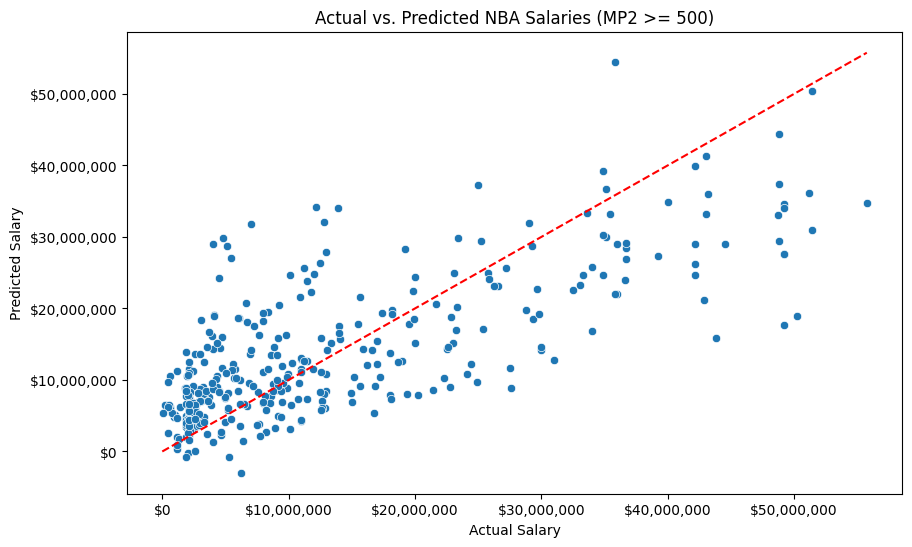

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_mp2, x='24/25 Salary', y='Predicted Salary')

max_salary = df_filtered_mp2['24/25 Salary'].max()
plt.plot([0, max_salary], [0, max_salary], color='red', linestyle='--')

plt.title('Actual vs. Predicted NBA Salaries (MP2 >= 500)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')

# Define the tick positions and their corresponding labels
tick_positions = [0, 10000000, 20000000, 30000000, 40000000, 50000000]
tick_labels = ['$0', '$10,000,000', '$20,000,000', '$30,000,000', '$40,000,000', '$50,000,000']

plt.xticks(tick_positions, tick_labels)
plt.yticks(tick_positions, tick_labels)

plt.tick_params(axis='x', which='both', top=False)
plt.tick_params(axis='y', which='both', right=False)

plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis focused on players with at least 500 minutes played (`MP2 >= 500`).
*   A linear regression model was built using selected player statistics ('MP', 'FG', 'FG%', '3P%', 'eFG%', 'PTS', 'PER', 'TS%', 'USG%', 'WS', 'WS/48', 'BPM', 'VORP') to predict player salaries.
*   Missing values in both the feature set and the target variable ('24/25 Salary') were handled using mean imputation.
*   The model achieved a Mean Absolute Error (MAE) of approximately \$8.39 million and an R-squared (\$) value of 0.46 on the test set.
*   The model was used to predict salaries for all filtered players, and residuals (actual salary - predicted salary) were calculated.
*   Analysis of residuals identified potentially overpaid and underpaid players relative to their statistics according to the model.
*   The top potentially overpaid player was Paul George, with a residual of approximately \$31.47 million.
*   The top potentially underpaid player was Jalen Williams, with a residual of approximately -\$25.01 million.
*   A scatter plot visualized the relationship between actual and predicted salaries, showing the model's performance and the spread of residuals.


In [ ]:
df_filtered_mp2 = df[df['MP2'] >= 500].copy()
display(df_filtered_mp2.head())

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,24/25 Salary
0,Nikola Jokic,29,DEN,C,70,70,36.7,11.2,19.5,0.576,...,29.5,12.7,3.8,16.4,0.307,9.9,3.3,13.3,9.8,51415938.0
1,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,0.519,...,34.8,11.9,4.8,16.7,0.309,8.9,2.6,11.5,8.9,35859950.0
2,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,0.601,...,35.2,7.8,3.7,11.5,0.241,6.9,2.5,9.5,6.6,48787676.0
3,Luka Doncic,25,DAL/LAL,PG,50,50,35.4,9.2,20.5,0.450,...,33.9,3.5,2.4,5.9,0.160,5.5,1.2,6.7,3.9,43031940.0
4,Karl-Anthony Towns,29,NYK,C,72,72,35.0,8.9,16.9,0.526,...,27.4,6.3,3.8,10.1,0.193,3.5,0.1,3.6,3.5,49205800.0


In [ ]:
df_filtered_mp2_numerical = df_filtered_mp2.select_dtypes(include=['number'])
display(df_filtered_mp2_numerical.head())

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,24/25 Salary
0,29,70,70,36.7,11.2,19.5,0.576,2.0,4.7,0.417,...,29.5,12.7,3.8,16.4,0.307,9.9,3.3,13.3,9.8,51415938.0
1,26,76,76,34.2,11.3,21.8,0.519,2.1,5.7,0.375,...,34.8,11.9,4.8,16.7,0.309,8.9,2.6,11.5,8.9,35859950.0
2,30,67,67,34.2,11.8,19.7,0.601,0.2,0.9,0.222,...,35.2,7.8,3.7,11.5,0.241,6.9,2.5,9.5,6.6,48787676.0
3,25,50,50,35.4,9.2,20.5,0.450,3.5,9.6,0.368,...,33.9,3.5,2.4,5.9,0.160,5.5,1.2,6.7,3.9,43031940.0
4,29,72,72,35.0,8.9,16.9,0.526,2.0,4.7,0.420,...,27.4,6.3,3.8,10.1,0.193,3.5,0.1,3.6,3.5,49205800.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in y_train
y_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y_train_imputed = y_imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

model = LinearRegression()
model.fit(X_train, y_train_imputed)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in y_test using the same imputer fitted on y_train
y_test_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y_test_imputed = y_test_imputer.fit_transform(y_test.values.reshape(-1, 1)).ravel()

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 8390659.89
R-squared: 0.46


In [ ]:
# Apply the same imputer to the full df_filtered_mp2 features
X_filtered_mp2_imputed = imputer.transform(df_filtered_mp2[features])

df_filtered_mp2['Predicted Salary'] = model.predict(X_filtered_mp2_imputed)
df_filtered_mp2['Residual'] = df_filtered_mp2['24/25 Salary'] - df_filtered_mp2['Predicted Salary']
display(df_filtered_mp2[['Player', '24/25 Salary', 'Predicted Salary', 'Residual']].head())

,Player,24/25 Salary,Predicted Salary,Residual
0,Nikola Jokic,51415938.0,5.034581e+07,1.070132e+06
1,Shai Gilgeous-Alexander,35859950.0,5.452788e+07,-1.866793e+07
2,Giannis Antetokounmpo,48787676.0,4.442381e+07,4.363869e+06
3,Luka Doncic,43031940.0,4.133232e+07,1.699620e+06
4,Karl-Anthony Towns,49205800.0,3.458083e+07,1.462497e+07


In [ ]:
# Sort by Residual in descending order for potentially overpaid players
overpaid_players_mp2 = df_filtered_mp2.sort_values(by='Residual', ascending=False)
print("Top 10 Potentially Overpaid Players (MP2 >= 500):")
display(overpaid_players_mp2[['Player', '24/25 Salary', 'Predicted Salary', 'Residual']].head(10))

# Sort by Residual in ascending order for potentially underpaid players
underpaid_players_mp2 = df_filtered_mp2.sort_values(by='Residual', ascending=True)
print("\nTop 10 Potentially Underpaid Players (MP2 >= 500):")
display(underpaid_players_mp2[['Player', '24/25 Salary', 'Predicted Salary', 'Residual']].head(10))

Top 10 Potentially Overpaid Players (MP2 >= 500):


,Player,24/25 Salary,Predicted Salary,Residual
85,Paul George,49205800.0,1.773429e+07,3.147151e+07
77,Bradley Beal,50203930.0,1.889407e+07,3.130986e+07
64,Rudy Gobert,43827586.0,1.592387e+07,2.790372e+07
110,Fred VanVleet,42846615.0,2.122316e+07,2.162346e+07
37,Kawhi Leonard,49205800.0,2.762727e+07,2.157853e+07
31,Jaylen Brown,49205800.0,2.763795e+07,2.156785e+07
23,Stephen Curry,55761216.0,3.479984e+07,2.096137e+07
26,Joel Embiid,51415938.0,3.096535e+07,2.045059e+07
72,Jimmy Butler,48798677.0,2.944168e+07,1.935699e+07
106,Jonathan Isaac,27600000.0,8.935579e+06,1.866442e+07



Top 10 Potentially Underpaid Players (MP2 >= 500):


,Player,24/25 Salary,Predicted Salary,Residual
42,Jalen Williams,4775760.0,2.978992e+07,-2.501416e+07
24,Cameron Thomas,4041249.0,2.903817e+07,-2.499692e+07
21,Franz Wagner,7007092.0,3.185047e+07,-2.484338e+07
39,Trey Murphy III,5159855.0,2.879352e+07,-2.363366e+07
10,Paolo Banchero,12160800.0,3.416642e+07,-2.200562e+07
25,Alperen Sengun,5424654.0,2.706733e+07,-2.164268e+07
36,Cade Cunningham,13940809.0,3.411560e+07,-2.017479e+07
58,Jalen Johnson,4510905.0,2.430614e+07,-1.979523e+07
20,Victor Wembanyama,12768960.0,3.209580e+07,-1.932684e+07
1,Shai Gilgeous-Alexander,35859950.0,5.452788e+07,-1.866793e+07


/tmp/ipython-input-280205550.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Residual', y='Player', data=overpaid_players_mp2.head(15), palette='Reds_d')


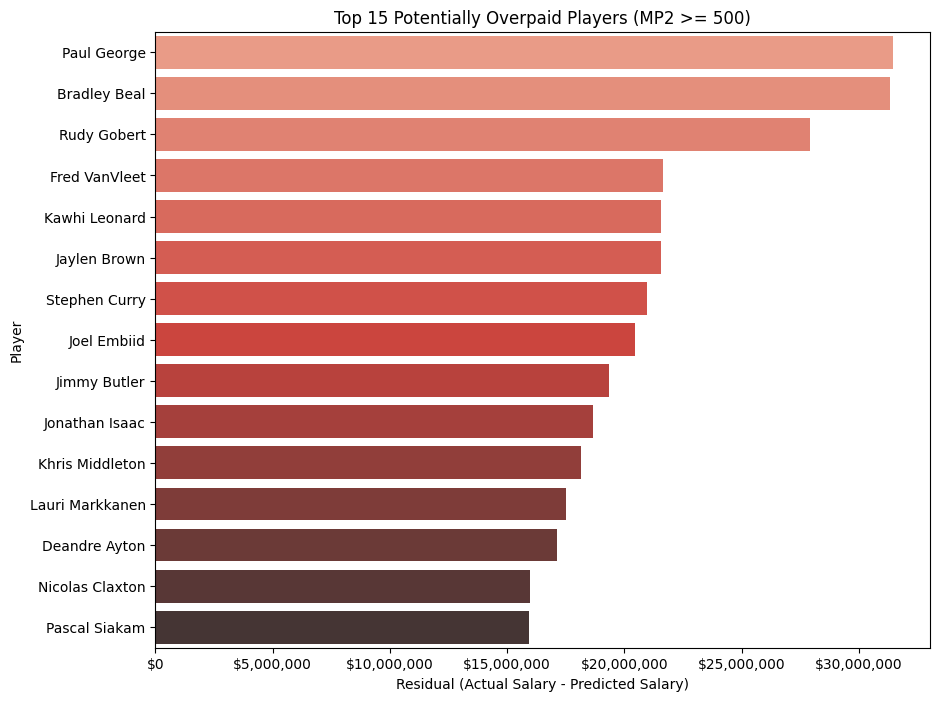

/tmp/ipython-input-280205550.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Residual', y='Player', data=underpaid_players_mp2.head(15), palette='Blues_d')


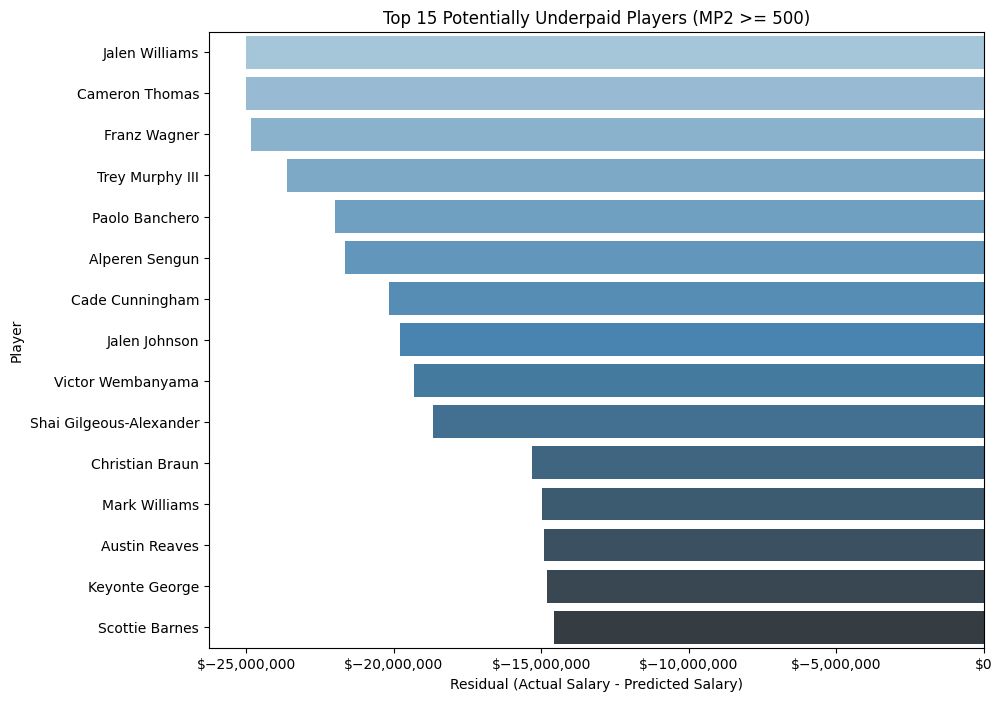

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Top 15 Overpaid Players (MP2 >= 500)
plt.figure(figsize=(10, 8))
sns.barplot(x='Residual', y='Player', data=overpaid_players_mp2.head(15), palette='Reds_d')
plt.title('Top 15 Potentially Overpaid Players (MP2 >= 500)')
plt.xlabel('Residual (Actual Salary - Predicted Salary)')
plt.ylabel('Player')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) # Format as dollar amounts
plt.show()

# Top 15 Underpaid Players (MP2 >= 500)
plt.figure(figsize=(10, 8))
sns.barplot(x='Residual', y='Player', data=underpaid_players_mp2.head(15), palette='Blues_d')
plt.title('Top 15 Potentially Underpaid Players (MP2 >= 500)')
plt.xlabel('Residual (Actual Salary - Predicted Salary)')
plt.ylabel('Player')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) # Format as dollar amounts
plt.show()

## Summary:

### Data Analysis Key Findings

* The analysis focused on players with at least 500 minutes played (`MP2 >= 500`).
* A linear regression model was built using selected player statistics ('MP', 'FG', 'FG%', '3P%', 'eFG%', 'PTS', 'PER', 'TS%', 'USG%', 'WS', 'WS/48', 'BPM', 'VORP') to predict player salaries.
* Missing values in both the feature set and the target variable ('24/25 Salary') were handled using mean imputation.
* The model achieved a Mean Absolute Error (MAE) of approximately \$8.39 million and an R-squared (\$) value of 0.46 on the test set.
* The model was used to predict salaries for all filtered players, and residuals (actual salary - predicted salary) were calculated.
* Analysis of residuals identified potentially overpaid and underpaid players relative to their statistics according to the model.
* The top potentially overpaid player was Paul George, with a residual of approximately \$31.47 million.
* The top potentially underpaid player was Jalen Williams, with a residual of approximately -\$25.01 million.
* A scatter plot visualized the relationship between actual and predicted salaries, showing the model's performance and the spread of residuals.
